In [ ]:

#Class imbalance >> when one class has higher percentage
#handle class imbalance problem

#upsampling
#downsampling
#SMOTE


In [ ]:
import numpy as np
import pandas as pd
np.random.seed(1) #for reproducibility

no_samples=1000
class_0_ratio = 0.9
no_class_0=int(no_samples * class_0_ratio)
no_class_1=100


class_0={'feature1':np.random.normal(0,1,no_class_0,),
         'feature2':np.random.normal(0,1,no_class_0,),
         'target':[0]*no_class_0}



In [ ]:
import pandas as pd
class_0=pd.DataFrame(class_0)
class_0

NameError: name 'class_0' is not defined

In [ ]:
class_1=pd.DataFrame({'feature1':np.random.normal(3,1,no_class_1,),
         'feature2':np.random.normal(3,1,no_class_1,),
         'target':[1]*no_class_1})
class_1

In [ ]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [ ]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [ ]:
#Up sampling

df_minority=df[df.target==1]
df_majority=df[df.target==0]

In [ ]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=1)
# df_minority_upsampled.shape
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
df_upsampled


,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
936,4.093307,2.373543,1
998,4.138173,3.647375,1
901,4.472396,1.236225,1
932,1.965537,4.084419,1


In [ ]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [ ]:
#DownSampling
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=1)
# df_minorityy_upsampled.shape

df_downsampled=pd.concat([df_majority_downsampled,df_minority])
df_downsampled


,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [ ]:
df_downsampled.target.value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [ ]:
from typing_extensions import final
import pandas as pd
##SMOTE >> Synthetic minority overSampling technique

from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=1)

df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


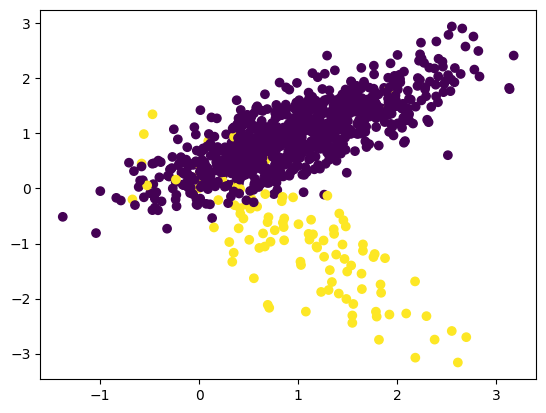

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,1.732201,-1.182023,1
1784,-0.064248,0.332229,1
1785,-0.023986,0.219274,1
1786,-0.164442,0.230921,1


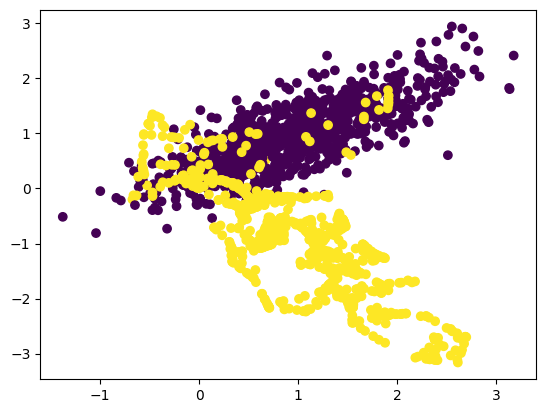

In [ ]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
plt.show()